In [1]:
import sys
sys.path.append("../../")
from simulation_classes.drones import Drones
from simulation_classes.simulation_setting import SimulationSettings
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### シミュレーターの設定(スケーリング含む)に必要な各種パラメータ
- 時間系
  - TOTAL_TIME: シミュレートする秒数
  - delta_t: 時間間隔
  - simulation_steps: 総ステップ数
- 距離のスケール
  - SCALING_FACTOR: [unit]を[m]に直すための係数。一旦これは定数で20にする。なので、simulation内で記述される速度 1 [unit/s]は20[m/s]に相当するということ。
- その他（運転系）
  - ドローン内に定義される変数ではあるが、max加速度とmin加速度は指定しても良いかもしれない。

#### ドローンに関する設定の変数一覧
- 速度に関するもの
  - v_0: 初速度 (v_xの初期値として代入される)
  - legal_speed: 法定速度(その機体が出せる最高速度)
  - a: 感応度(最適速度に対してどのくらい近づこうとするかのパラメータ. 高いほど速度の収束が早い)
  - c: OVモデルに必要。おそらく車間距離に関するパラメタ

- その他、シミュレーション条件に相当するもの
  - xcor, ycor: 初期位置
  - volume（未実装）: 機体サイズ

In [2]:
TOTAL_TIME = 60
time_step = 0.1
simulation_steps = int(TOTAL_TIME / time_step)
scale_factor = 20


In [3]:
simulation = SimulationSettings(
    drone_num=1, 
    TOTAL_TIME=TOTAL_TIME, 
    time_step=time_step, 
    scale_factor=scale_factor)

In [7]:
simulation.test()

print(simulation.drones[0].xcorList)

[0, 0.020000000000000004, 0.05800000000000001, 0.11220000000000002, 0.18098000000000003, 0.26288200000000006, 0.35659380000000007, 0.46093442000000007, 0.5748409780000001, 0.6973568802000001, 0.8276211921800001, 0.9648590729620001, 1.1083731656658, 1.2575358490992201, 1.411782264189298, 1.5706040377703683, 1.7335436339933314, 1.9001892705939984, 2.0701703435345986, 2.243153309181139, 2.418837978263025, 2.5969541804367227, 2.7772587623930507, 2.9595328861537458, 3.143579597538371, 3.329221637784534, 3.5162994740060807, 3.7046695266054726, 3.8942025739449253, 4.084782316550433, 4.276304084895389, 4.46867367640585, 4.661806308765265, 4.855625677888739, 5.050063110099865, 5.245056799089879, 5.440551119180891, 5.636496007262802, 5.832846406536522, 6.029561765882869, 6.226605589294582, 6.4239450303651235, 6.621550527328611, 6.8193954745957495, 7.017455927136174, 7.215710334422557, 7.414139300980301, 7.612725370882271, 7.811452833794044, 8.01030755041464, 8.209276795373174, 8.408349115835858,

In [6]:
# いったんとりあえず動かす
leader = Drones(xcor=0, ycor = 0, v_0=0,a=1,c=2,legal_speed=2)

for i in range(simulation_steps):
  leader.leader_update(time_step)
  leader.record()


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

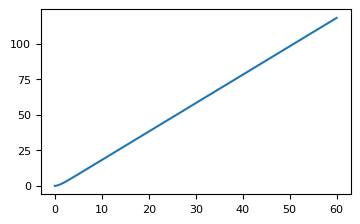

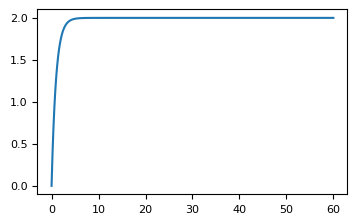

In [4]:
t = np.linspace(0,time_step*(simulation_steps), simulation_steps+1)

plt.figure(figsize=(4,2.4))
plt.plot(t,np.array(leader.xcorList))
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.figure(figsize=(4,2.4))
plt.plot(t,np.array(leader.v_xList))
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

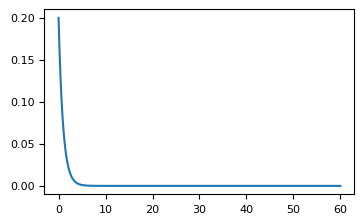

In [5]:
ax_list = np.diff(np.array(leader.v_xList))
t = np.linspace(0,time_step*(simulation_steps), simulation_steps)

plt.figure(figsize=(4,2.4))
plt.plot(t,ax_list)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)